In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Read the file


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving cancer.csv to cancer.csv


In [ ]:
dataset = pd.read_csv("cancer.csv")

In [ ]:
print(dataset)

     Clump  UnifSize  UnifShape  MargAdh  ...  BlandChrom  NormNucl  Mit  Class
0        5         1          1        1  ...           3         1    1      1
1        5         4          4        5  ...           3         2    1      1
2        3         1          1        1  ...           3         1    1      1
3        6         8          8        1  ...           3         7    1      1
4        4         1          1        3  ...           3         1    1      1
..     ...       ...        ...      ...  ...         ...       ...  ...    ...
678      3         1          1        1  ...           1         1    1      1
679      2         1          1        1  ...           1         1    1      1
680      5        10         10        3  ...           8        10    2      0
681      4         8          6        4  ...          10         6    1      0
682      4         8          8        5  ...          10         4    1      0

[683 rows x 10 columns]


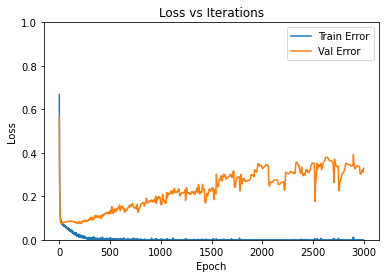

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.title('Loss vs Iterations')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

plot_history(history)

In [ ]:
dataset.isna().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [3]:
x = np.asanyarray(dataset.drop(columns=['Class']))
y = np.asanyarray(dataset[['Class']])
x = StandardScaler().fit_transform(x)
print(x.shape)
print(y.shape)

NameError: ignored

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,
                                                random_state=0)

In [ ]:
def build_model():

  model = keras.Sequential()
  model.add(keras.layers.Dense(128, kernel_initializer='glorot_uniform', 
                               activation='relu', input_shape=[x.shape[1]]))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(32, activation='tanh'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adam())
  return  model

In [ ]:

model = build_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               1280      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


Epoch 1/3000
3/3 [==============================] - 0s 36ms/step - loss: 0.7729 - val_loss: 0.6480
Epoch 2/3000
3/3 [==============================] - 0s 13ms/step - loss: 0.5853 - val_loss: 0.4773
Epoch 3/3000
3/3 [==============================] - 0s 12ms/step - loss: 0.4350 - val_loss: 0.3508
Epoch 4/3000
3/3 [==============================] - 0s 12ms/step - loss: 0.3257 - val_loss: 0.2623
Epoch 5/3000
3/3 [==============================] - 0s 13ms/step - loss: 0.2480 - val_loss: 0.2024
Epoch 6/3000
3/3 [==============================] - 0s 12ms/step - loss: 0.1984 - val_loss: 0.1617
Epoch 7/3000
3/3 [==============================] - 0s 13ms/step - loss: 0.1626 - val_loss: 0.1341
Epoch 8/3000
3/3 [==============================] - 0s 14ms/step - loss: 0.1425 - val_loss: 0.1150
Epoch 9/3000
3/3 [==============================] - 0s 12ms/step - loss: 0.1250 - val_loss: 0.1016
Epoch 10/3000
3/3 [==============================] - 0s 12ms/step - loss: 0.1163 - val_loss: 0.0923
Epoch 11/

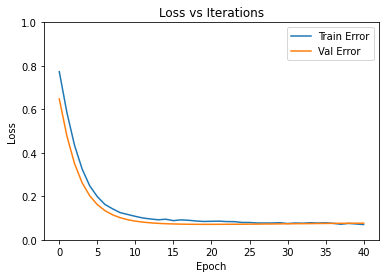

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min', patience=20)
model = build_model()
history = model.fit(xtrain, ytrain, 
                    batch_size=150, epochs=3000, 
                    validation_split=0.2, verbose=1, 
                    callbacks=[es])
plot_history(history)
score = model.evaluate(xtest,ytest)